In [15]:
import os
import sys
module_path = os.path.abspath(os.path.join('fede'))
if module_path not in sys.path:
    sys.path.append(module_path)
from client import Client
from supported_modles import Supported_modles
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import numpy as np
import utils

In [16]:
selected_model = Supported_modles.NN_classifier
client1 = Client("node1","0.0.0.0", 5001, selected_model)
dataset = client1.load_data('data/Wednesday-workingHours.pcap_ISCX.csv', True)

Creating node1.


In [17]:
client1.preprocess_data(dataset, True)

439683
251723


In [18]:
client1.prep_data()

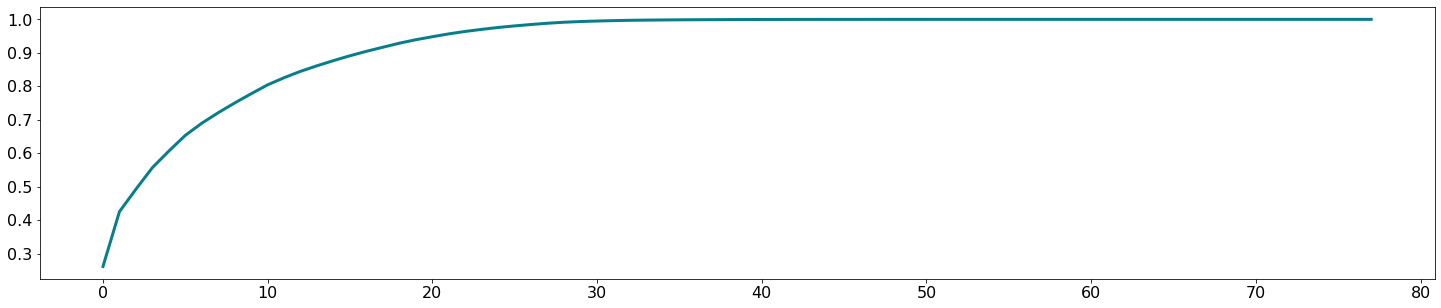

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(client1.x)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

In [6]:
import pandas as pd

In [7]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(client1.feature_names) + 1)],
    index=client1.feature_names
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78
Destination Port,-0.204294,0.010896,0.042399,0.056142,0.512726,-0.061614,-0.198903,-0.042922,-0.134494,0.446075,...,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
Flow Duration,0.887645,-0.012713,0.156508,-0.025331,0.013524,0.153598,-0.019654,0.031178,0.003178,0.050160,...,-1.158754e-30,-8.478990e-31,-7.341384e-31,9.319579e-32,1.530629e-32,-1.559194e-32,3.977790e-32,7.982011e-34,2.068087e-33,-1.916148e-32
Total Fwd Packets,0.034144,0.992682,-0.029871,-0.074400,-0.012890,-0.003022,-0.008901,-0.010054,-0.000108,-0.008509,...,-2.876328e-19,2.652623e-19,2.972959e-19,1.898375e-21,-5.716187e-22,-3.019273e-23,7.346918e-23,4.601345e-23,5.264877e-23,4.795892e-30
Total Backward Packets,0.033673,0.991865,-0.030137,-0.074917,-0.013400,-0.004606,-0.009177,-0.010174,-0.000508,-0.008340,...,8.807237e-19,1.134808e-18,1.910999e-18,6.036537e-20,1.441013e-21,5.371930e-21,1.723782e-20,-1.548596e-21,2.453026e-22,3.418023e-29
Total Length of Fwd Packets,0.090326,0.795148,0.124117,0.263857,0.067836,0.004192,0.047259,0.056603,0.000472,0.055286,...,-1.108099e-18,-1.258775e-18,-2.160238e-18,-7.024322e-20,-1.655451e-21,-6.289520e-21,-2.018609e-20,1.829040e-21,-2.867980e-22,-3.997579e-29


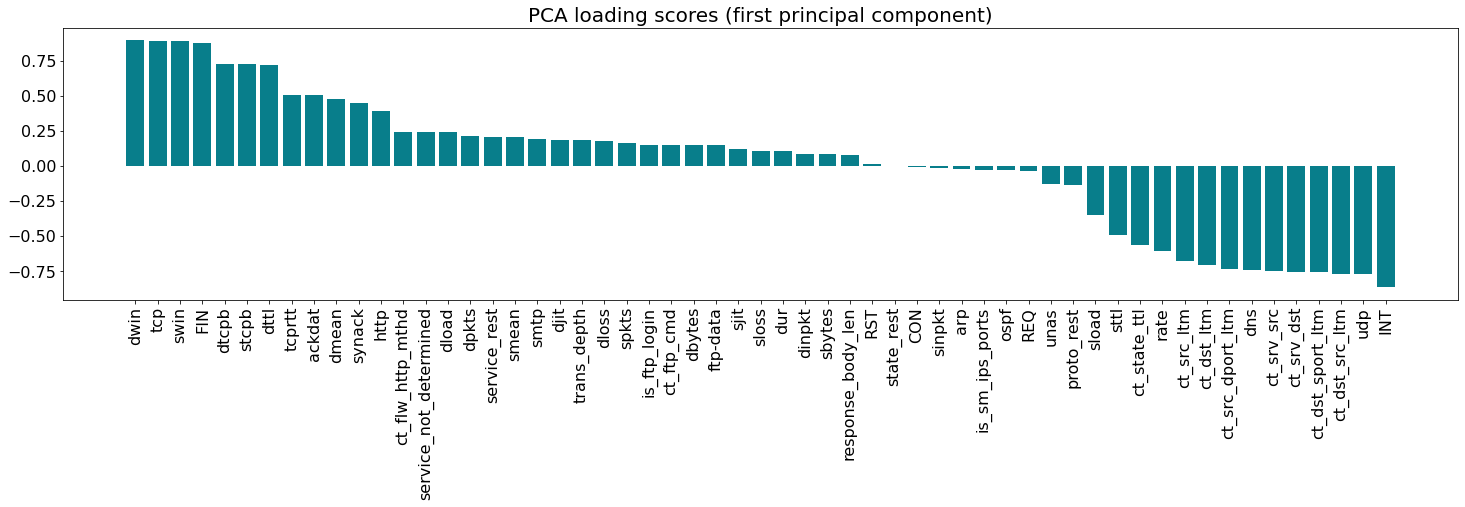

In [22]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.rcParams["figure.figsize"] = (25,5)
plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

In [23]:
client, X,y, test_x, test_y = utils.centralized_data(selected_model, False, False)

Creating node1.
Creating node2.


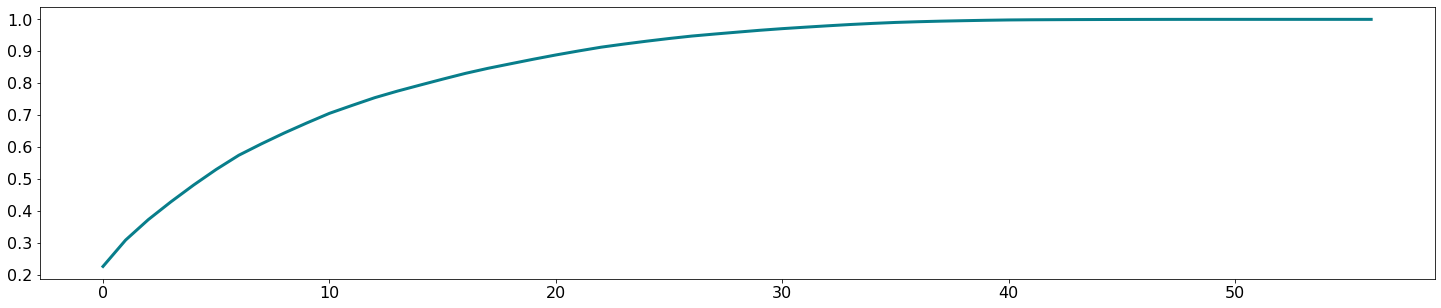

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(X)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [13]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(client.feature_names) + 1)],
    index=client.feature_names
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57
dur,0.104767,-0.116830,0.298426,0.234668,0.316176,0.042376,0.355361,0.612244,-0.230712,-0.117611,...,0.000316,-0.000753,0.000176,-0.000029,1.551473e-06,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
spkts,0.163160,0.106970,0.581681,0.480445,0.502957,0.091355,-0.260177,-0.061904,0.035053,0.108615,...,-0.037205,0.000529,-0.002519,-0.003231,-2.430605e-06,4.902116e-31,-1.594000e-30,5.008651e-31,5.151239e-31,-3.515142e-31
dpkts,0.215816,0.192391,0.802885,0.074965,-0.185159,0.027730,0.306294,-0.150469,0.028470,-0.078162,...,0.040691,-0.006340,-0.006564,0.013192,1.035246e-06,3.721331e-31,1.064695e-31,-2.041329e-31,-6.977458e-31,6.222136e-31
sbytes,0.080991,0.063292,0.425030,0.509537,0.595966,0.077207,-0.324469,-0.063227,0.079488,0.120578,...,-0.004867,-0.005094,-0.020319,0.005903,-2.521182e-06,-2.268712e-30,3.106113e-30,-7.389954e-31,-4.984551e-31,-7.476066e-32
dbytes,0.150214,0.167787,0.741041,-0.000595,-0.292683,-0.012546,0.402769,-0.144655,0.044541,-0.112121,...,-0.039780,0.008944,0.015963,0.008356,6.530243e-07,-5.061940e-30,8.355780e-31,7.958211e-32,-2.114210e-31,-3.903264e-31


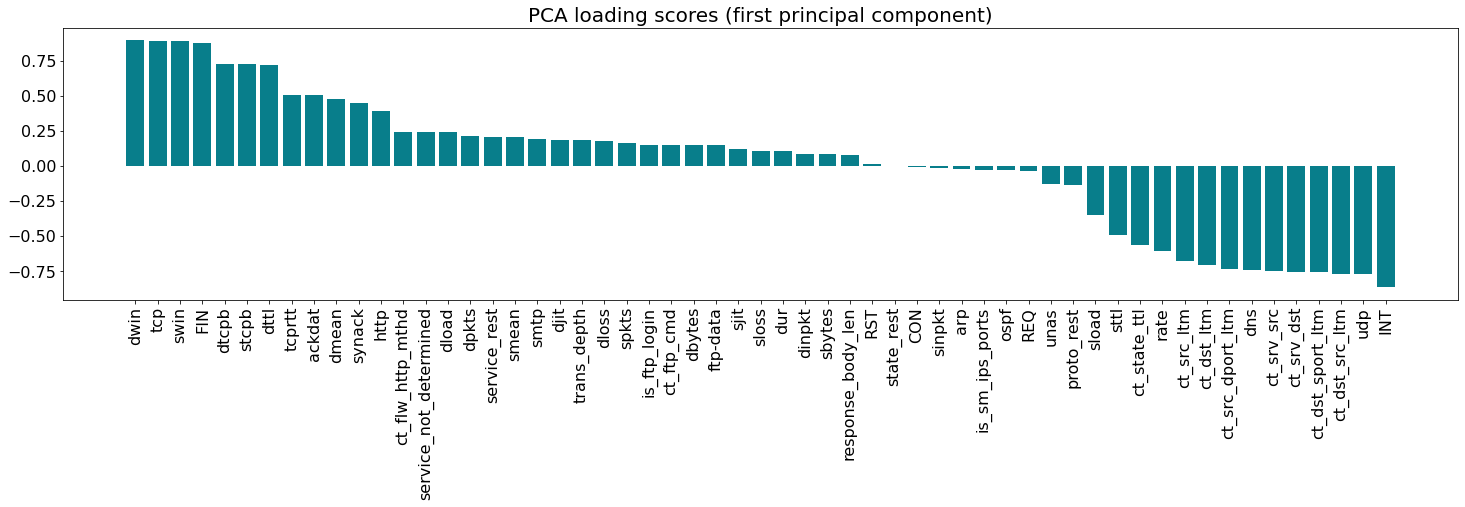

In [14]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.rcParams["figure.figsize"] = (25,5)
plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()
